In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import statistics
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import datasets
from sklearn.decomposition import PCA as sk_PCA
from sklearn.cluster import KMeans as sk_KMeans, DBSCAN as sk_DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from scipy.special import expit
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import precision_score
data = pd.read_csv('/content/sample_data/spotify52kData.csv')
star_data = pd.read_csv('/content/sample_data/starRatings.csv', header=None)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from numpy import random
random.seed(14844467) 

# Q1:

In [ ]:
dataQ1 = data[['popularity', 'duration']].copy()
dataQ1 = dataQ1.dropna()
z = np.abs((dataQ1['duration'] - dataQ1['duration'].mean()) / dataQ1['duration'].std())
dataQ1 = dataQ1[z <= 3]

popularity = dataQ1['popularity'].to_numpy()
duration = dataQ1['duration'].to_numpy()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

predict = duration.reshape(-1, 1)
outcome = popularity.reshape(-1, 1)

reg = LinearRegression().fit(predict,outcome)
outcome_hat = reg.predict(predict)
COD = r2_score(outcome,outcome_hat)
print(f"COD = {COD}")

# plotting
plt.figure(figsize=(8,5))
plt.scatter(duration, popularity, s = 1)
plt.xlabel('duration')
plt.ylabel('popularity')
plt.plot(duration, outcome_hat, color='red', label='Linear Regression')
plt.title('Linear Regression and Scatter Plot')
plt.show()

# Q2:

In [ ]:
dataQ2 = data[['popularity']].copy()
dataQ2 = dataQ2.dropna()
popularity = dataQ2['popularity'].to_numpy()

In [ ]:
explicit_popularity = popularity[:5000]
nonexplicit_popularity = popularity[5000:]
pval = stats.ttest_ind(explicit_popularity, nonexplicit_popularity, alternative = 'greater')[1]

alpha = 0.005
if pval < alpha:
    print(f"p-value = {pval}")
    print("Reject the null hypothesis: Explicitly rated songs are more popular than songs that are not explicit.")
else:
    print(f"p-value = {pval}")
    print("Fail to reject the null hypothesis: No significant difference in popularity between explicitly rated songs and non-explicitly rated songs.")

# plotting
labels = ['Explicit', 'Non-explicit']
plot_data = [explicit_popularity, nonexplicit_popularity]
plt.boxplot(plot_data, labels = labels)
plt.title("Explicitly Rated Songs vs. Non-explicitly Rated Songs")
plt.ylabel("Popularity (number of plays)")
plt.show()

# Q3:

In [ ]:
dataQ3 = data[['popularity', 'mode']].copy()
dataQ3 = dataQ3.dropna()
popularity = dataQ3['popularity'].to_numpy()
mode = dataQ3['mode'].to_numpy()

In [ ]:
major_key = popularity[mode == 1]
minor_key = popularity[mode == 0]
pval = stats.mannwhitneyu(major_key, minor_key, alternative = 'greater')[1]

alpha = 0.005
if pval < alpha:
    print(f"p-value = {pval}")
    print("Reject the null hypothesis: Major-key songs are more popular than minor-key songs.")
else:
    print(f"p-value = {pval}")
    print("Fail to reject the null hypothesis: No significant difference in popularity between major key songs and minor key songs.")

# plotting
plt.figure(figsize=(8, 5))
plt.hist(major_key, bins=30, alpha=0.3, label='Major', color='blue', density=True)
plt.hist(minor_key, bins=30, alpha=0.3, label='Minor', color='red', density=True)
plt.title('Histogram Comparison between Major-key and Minor-key Songs')
plt.legend()
plt.show()

# Q4:

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

dataQ4 = data[['popularity','duration','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']].copy()
dataQ4 = dataQ4.dropna()
dataQ4_list = ['popularity','duration','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']

In [ ]:
# splitting into training/testing using RNG
X = dataQ4[dataQ4_list]
y = dataQ4['popularity']
rng = np.random.RandomState(14844467)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng)

In [ ]:
# training
for i in range(10):
    dataQ4_i = X_train[[dataQ4_list[0], dataQ4_list[i + 1]]].copy()
    dataQ4_i['popularity'] = y_train
    dataQ4_i = dataQ4_i.dropna()

    scaler = StandardScaler()
    p = dataQ4_i[dataQ4_list[i + 1]].to_numpy()
    predict = scaler.fit_transform(p.reshape(-1, 1))
    o = dataQ4_i['popularity'].to_numpy()
    outcome = scaler.fit_transform(o.reshape(-1, 1))

    reg = LinearRegression().fit(predict, outcome)
    outcome_hat = reg.predict(predict)
    COD[i] = r2_score(outcome, outcome_hat)

bestid = np.argmax(COD)+1
best_predictor = dataQ4_list[bestid]
print("best predictor is: " + best_predictor)

# build the model only using the best predictor
bp_data = X_train[[dataQ4_list[0], dataQ4_list[bestid]]].copy()
bp_data['popularity'] = y_train
bp_data = bp_data.dropna()

bp_trainp = bp_data[dataQ4_list[bestid]].to_numpy().reshape(-1, 1)
bp_traino = bp_data['popularity'].to_numpy().reshape(-1, 1)

bestp_updated = LinearRegression().fit(bp_trainp, bp_traino)

# Predicting on the test set using the best predictor
testbp = X_test[[dataQ4_list[0], dataQ4_list[bestid]]].copy()
testbp['popularity'] = y_test
testbp = testbp.dropna()

tp = testbp[dataQ4_list[bestid]].to_numpy().reshape(-1, 1)
to_val = testbp['popularity'].to_numpy().reshape(-1, 1)

toutcome_hat = bestp_updated.predict(tp)
test_COD = r2_score(to_val, toutcome_hat)

print(f"R^2 using the best predictor ({best_predictor}): {test_COD}")

array([1.00000000e+00, 2.98675322e-03, 1.38070294e-03, 3.12757103e-03,
       3.62524829e-03, 2.35542074e-03, 6.88190842e-04, 2.10169592e-02,
       1.92247434e-03, 1.27940627e-03, 6.92653534e-06])

In [ ]:
# plotting
plt.figure(figsize=(8, 5))
plt.scatter(bp_data[dataQ4_list[bestid]], bp_data['popularity'], color='blue', label='Original Data')
plt.plot(bp_trainp, bestp_updated.predict(bp_trainp), color='red', label='Regression Line')
plt.xlabel('Best Predictor')
plt.ylabel('Popularity')
plt.title('Linear Regression Model')
plt.show()

# Q5:

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

dataQ5 = data[['popularity','duration','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']].copy()
dataQ5 = dataQ5.dropna()
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

0.047679614286711636

In [ ]:
# splitting into training/testing using RNG
X = dataQ5[features] # modified a bit from Q4 for better readability
y = dataQ5['popularity']
rng = np.random.RandomState(14844467)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rng)

# build the model
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
multiple_regression = LinearRegression().fit(X_train, y_train)

# test the model
y_pred = multiple_regression.predict(X_test)
test_r2_score = r2_score(y_test, y_pred)
print(f"R^2 = {test_r2_score}")

In [ ]:
# Regularization
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

# Regularization using RidgeCV
alphas = [2.0**c for c in np.arange(-10, 10)]
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train, y_train)

besta = ridge_cv.alpha_
ridge = Ridge(alpha=besta)
ridge.fit(X_train, y_train)

# test the regularized model
ridge_y_pred = ridge.predict(X_test)
ridge_test_r2_score = r2_score(y_test, ridge_y_pred)
print(f"R^2 with Ridge regularization = {ridge_test_r2_score}")

In [ ]:
# plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Regression: Actual vs Predicted')
plt.show()

# Q6 

In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
predictors = data[['duration','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']].copy()

## Run the PCA

In [ ]:
zscoredData = stats.zscore(predictors)
pca = PCA().fit(zscoredData)
eigVals = pca.explained_variance_
loadings = pca.components_*-1
origDataNewCoordinates = pca.fit_transform(zscoredData)*-1


## Plot the eigenvalues

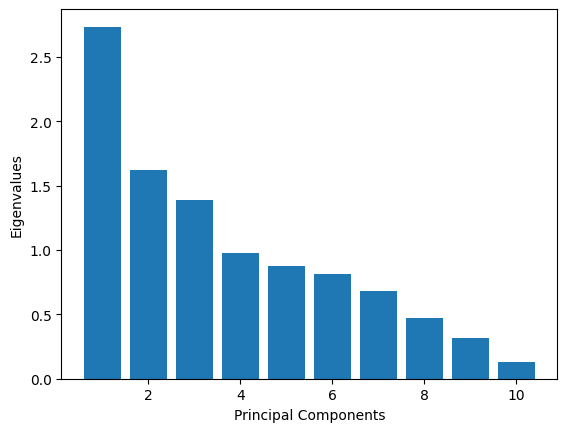

Proportion variance explained by the first 3 PCs: 0.75906


In [ ]:
# Plot the eigenvalues
numPredictors = np.size(predictors,axis=1)
plt.bar(np.linspace(1,numPredictors,numPredictors),eigVals)
plt.xlabel('Principal Components')
plt.ylabel('Eigenvalues')
plt.show()
print('Proportion variance explained by the first 3 PCs:',np.sum(eigVals[:5]/np.sum(eigVals)).round(5))

In [ ]:
scaler = StandardScaler()
predictor_X = scaler.fit_transform(predictors)

pca=sk_PCA(n_components=3)

predictor_X = pca.fit_transform(predictor_X)

components=pca.components_
components=pd.DataFrame(components, columns=predictors.columns)
components

,duration,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-0.028965,-0.154893,-0.536818,-0.539108,-0.067178,0.474215,0.271022,-0.109100,-0.209770,-0.193923
1,0.292382,-0.568718,0.191436,0.039442,-0.144096,-0.240438,0.328317,0.070635,-0.548774,0.245683
2,-0.072764,-0.187694,0.054129,-0.028588,0.651549,0.179810,-0.141269,0.667588,-0.132136,-0.125662


## Clean up the genre

Genre label may not be accurate, group some labels together (for example, "electronic","edm","electro" are now all under "edm")

In [ ]:
data['track_genre'].value_counts()

acoustic          1000
afrobeat          1000
dub               1000
dubstep           1000
edm               1000
electro           1000
electronic        1000
emo               1000
folk              1000
forro             1000
french            1000
funk              1000
garage            1000
german            1000
gospel            1000
goth              1000
grindcore         1000
groove            1000
grunge            1000
guitar            1000
happy             1000
hard-rock         1000
hardcore          1000
hardstyle         1000
heavy-metal       1000
drum-and-bass     1000
disney            1000
disco             1000
cantopop          1000
alt-rock          1000
alternative       1000
ambient           1000
anime             1000
black-metal       1000
bluegrass         1000
blues             1000
brazil            1000
breakbeat         1000
british           1000
chicago-house     1000
detroit-techno    1000
children          1000
chill             1000
classical  

In [ ]:
data = data.assign(Genre = data['track_genre'])

In [ ]:
data.loc[data['track_genre'] == 'hardstyle', 'Genre'] = "rock"
data.loc[data['track_genre'] == 'heavy-metal', 'Genre'] = "rock"
data.loc[data['track_genre'] == 'black-metal', 'Genre'] = "rock"
data.loc[data['track_genre'] == 'death-metal', 'Genre'] = "rock"
data.loc[data['track_genre'] == 'grunge', 'Genre'] = "rock"
data.loc[data['track_genre'] == 'garage', 'Genre'] = "rock"
data.loc[data['track_genre'] == 'grindcore', 'Genre'] = "rock"
data.loc[data['track_genre'] == 'goth', 'Genre'] = "rock"
data.loc[data['track_genre'] == 'alt-rock', 'Genre'] = "rock"
data.loc[data['track_genre'] == 'hard-rock', 'Genre'] = "rock"
data.loc[data['track_genre'] == 'hardcore', 'Genre'] = "rock"
data.loc[data['track_genre'] == 'emo', 'Genre'] = "rock"

data.loc[data['track_genre'] == 'happy', 'Genre'] = "chill"

data.loc[data['track_genre'] == 'guitar', 'Genre'] = "acoustic"
data.loc[data['track_genre'] == 'drum-and-bass', 'Genre'] = "acoustic"
data.loc[data['track_genre'] == 'dub', 'Genre'] = "acoustic"
data.loc[data['track_genre'] == 'dubstep', 'Genre'] = "acoustic"

data.loc[data['track_genre'] == 'country', 'Genre'] = "folk"
data.loc[data['track_genre'] == 'bluegrass', 'Genre'] = "folk"
data.loc[data['track_genre'] == 'blues', 'Genre'] = "folk"

data.loc[data['track_genre'] == 'club', 'Genre'] = "dance-electronic"
data.loc[data['track_genre'] == 'disco', 'Genre'] = "dance-electronic"
data.loc[data['track_genre'] == 'deep-house', 'Genre'] = "dance-electronic"
data.loc[data['track_genre'] == 'dancehall', 'Genre'] = "dance-electronic"
data.loc[data['track_genre'] == 'chicago-house', 'Genre'] = "dance-electronic"
data.loc[data['track_genre'] == 'groove', 'Genre'] = "dance-electronic"
data.loc[data['track_genre'] == 'electro', 'Genre'] = "dance-electronic"
data.loc[data['track_genre'] == 'edm', 'Genre'] = "dance-electronic"
data.loc[data['track_genre'] == 'detroit-techno', 'Genre'] = "dance-electronic"
data.loc[data['track_genre'] == 'breakbeat', 'Genre'] = "dance-electronic"
data.loc[data['track_genre'] == 'dance', 'Genre'] = "dance-electronic"
data.loc[data['track_genre'] == 'electronic', 'Genre'] = "dance-electronic"
data.loc[data['track_genre'] == 'funk', 'Genre'] = "dance-electronic"

data.loc[data['track_genre'] == 'forro', 'Genre'] = "alternative"
data.loc[data['track_genre'] == 'ambient', 'Genre'] = "alternative"
data.loc[data['track_genre'] == 'french', 'Genre'] = "alternative"
data.loc[data['track_genre'] == 'german', 'Genre'] = "alternative"
data.loc[data['track_genre'] == 'brazil', 'Genre'] = "alternative"
data.loc[data['track_genre'] == 'cantopop', 'Genre'] = "alternative"
data.loc[data['track_genre'] == 'british', 'Genre'] = "alternative"
data.loc[data['track_genre'] == 'afrobeat', 'Genre'] = "alternative"

In [ ]:
data['Genre'].value_counts()

dance-electronic    13000
rock                12000
alternative          9000
acoustic             5000
folk                 4000
chill                2000
anime                1000
children             1000
classical            1000
comedy               1000
disney               1000
gospel               1000
hip-hop              1000
Name: Genre, dtype: int64

## Silhouette Score

In [ ]:
music_pca_pipeline = Pipeline([('scalÍing', StandardScaler()), ('pca', sk_PCA(n_components=2))])
music_processed = music_pca_pipeline.fit_transform(predictors.values)

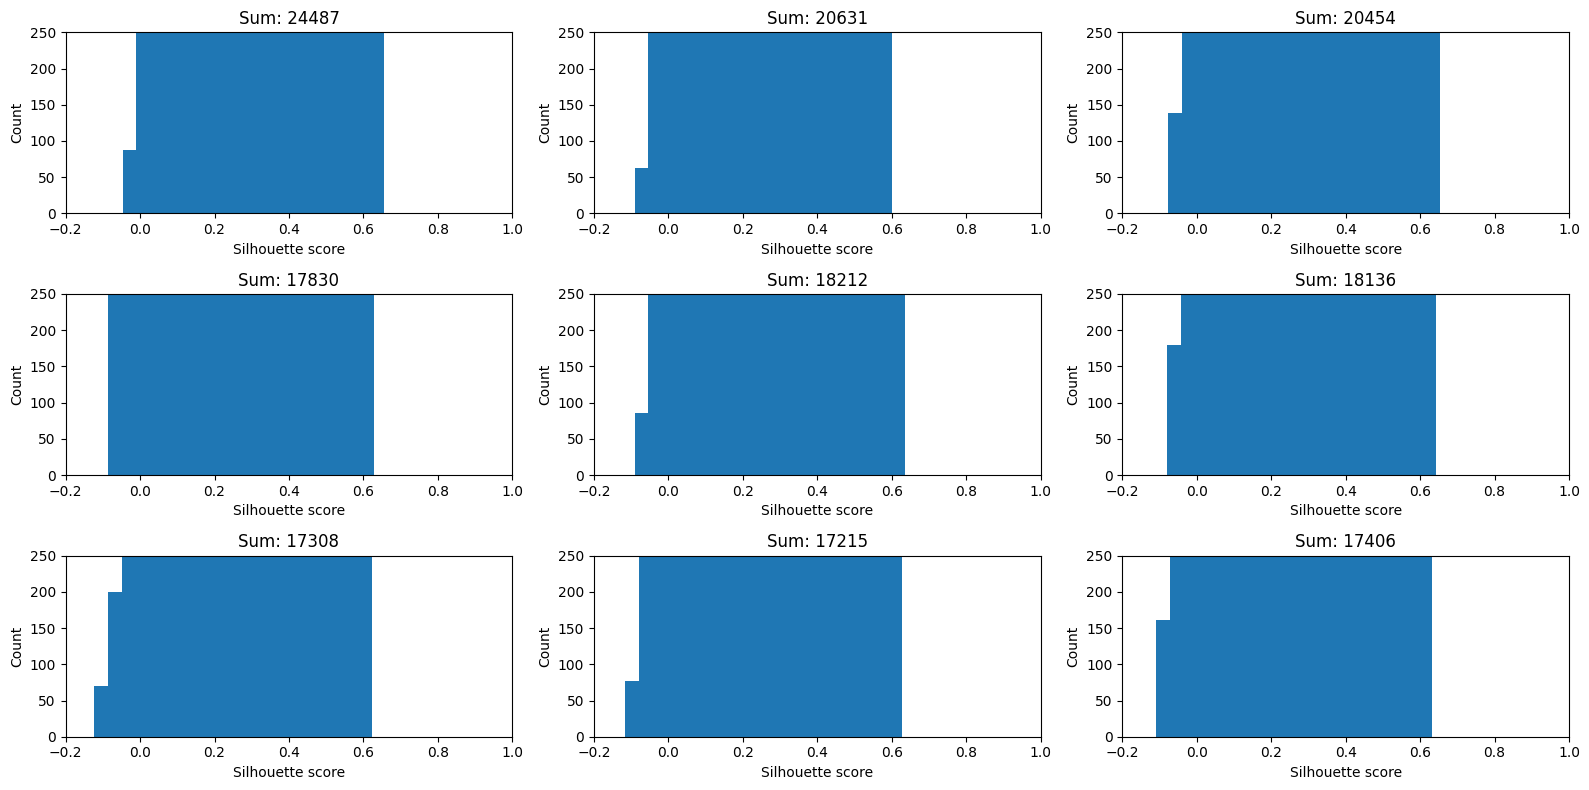

In [ ]:
numClusters = 9 # how many clusters are we looping over? (from 2 to 10)
Q = np.empty([numClusters,1])*np.NaN # init container to store sums

# Compute kMeans:
plt.figure(figsize=(16, 8))
for ii in range(2, 11): # Loop through each cluster (from 2 to 10!)
    kMeans = sk_KMeans(n_clusters = int(ii)).fit(music_processed) # compute kmeans using scikit
    cId = kMeans.labels_ # vector of cluster IDs that the row belongs to
    cCoords = kMeans.cluster_centers_ # coordinate location for center of each cluster
    s = silhouette_samples(music_processed,cId) # compute the mean silhouette coefficient of all samples
    Q[ii-2] = sum(s) # take the sum
    # Plot data:
    plt.subplot(3,3,ii-1)›
    plt.hist(s,bins=20)
    plt.xlim(-0.2,1)
    plt.ylim(0,250)
    plt.xlabel('Silhouette score')
    plt.ylabel('Count')
    plt.title('Sum: {}'.format(int(Q[ii-2]))) # sum rounded to nearest integer
    plt.tight_layout() # adjusts subplot padding

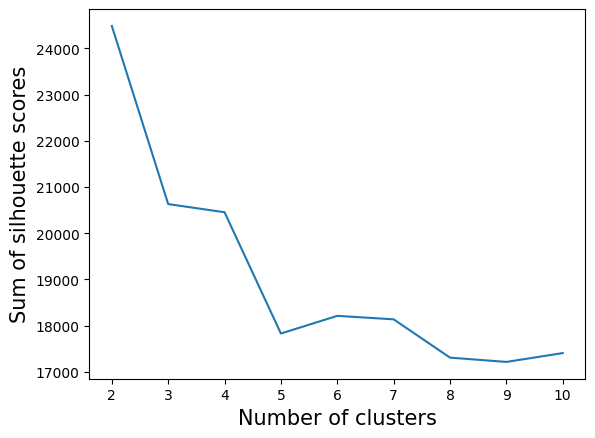

In [ ]:
plt.plot(np.linspace(2,10,9),Q)
plt.xlabel('Number of clusters', fontsize=15)
plt.ylabel('Sum of silhouette scores', fontsize=15)
plt.show()

## K - means clustering

In [ ]:
target = pd.DataFrame(data['Genre'])
target['id'] = target.groupby(['Genre']).ngroup()
target_codes = np.array(target['id'])

In [ ]:
def KMeans(X, n_clusters, rseed=14844467):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(14844467)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

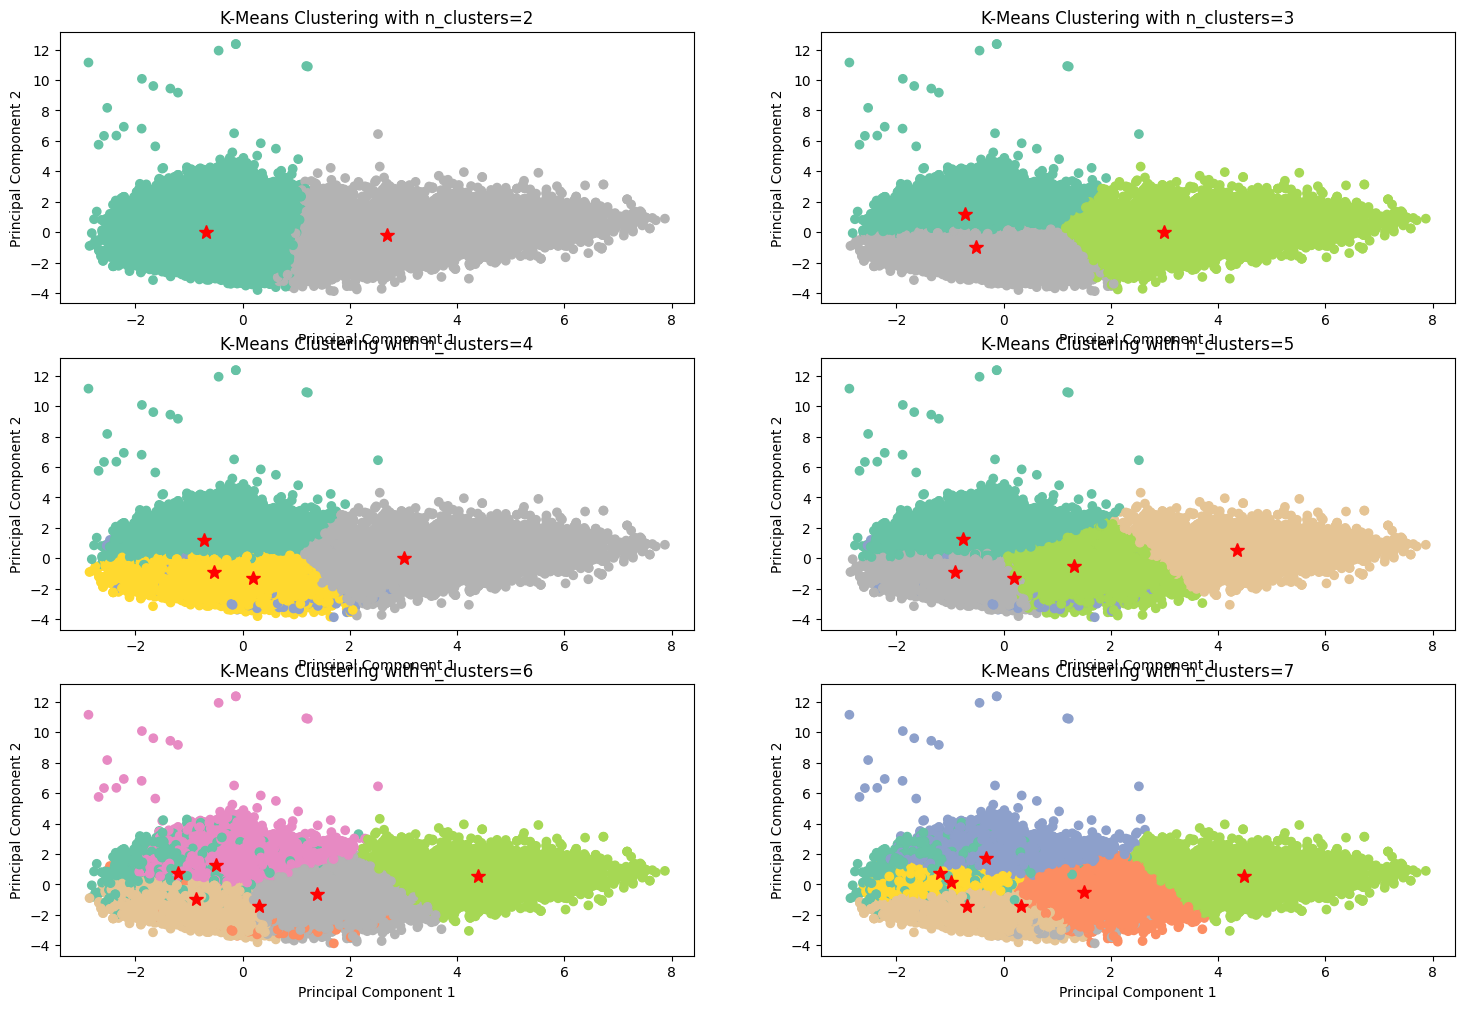

In [ ]:
n_clusters=range(2, 8)
plt.figure(figsize=(18, 12))
for i, c_num in enumerate(n_clusters):
    centers, labels = KMeans(predictor_X, c_num)
    plt.subplot(3, 2, i+1)
    plt.title('K-Means Clustering with n_clusters={}'.format(c_num))
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.scatter(predictor_X[:, 0], predictor_X[:, 1], c=labels, cmap='Set2')
    plt.plot(centers[:, 0], centers[:, 1], '*',markersize=10,color='red')

# Q7

In [ ]:
features = ['valence']
X_train, X_test, y_train, y_test = train_test_split(data[features], data['mode'], test_size=0.2, random_state=random.seed(14844467))


## logistic regression - valence as feature

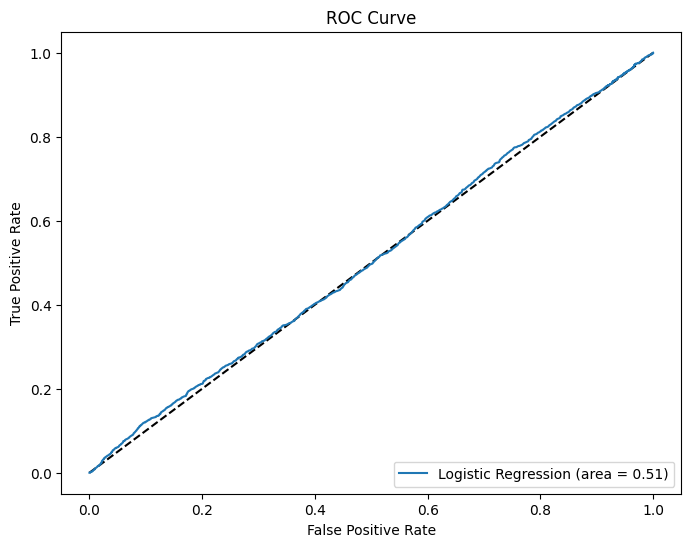

auc： 0.5072332823419279


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]
y_pred_class = log_reg.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc_score)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

y_pred_class = log_reg.predict(X_test)
auc = roc_auc_score(y_test, y_pred_prob)
print("auc：",auc)

logistic regression is not working well here
we include another feature "key" and use a SVM


## SVM

In [ ]:
yOutcomes = data['mode'].to_numpy()
predictors = data[["key", "valence"]].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(predictors, yOutcomes, test_size=0.2,random_state=random.seed(14844467))

In [ ]:
clf = svm.SVC(kernel='linear')

In [ ]:
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.62625


# Q8


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

## without standardizing the features

In [ ]:
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
y = data['Genre']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], y_encoded, test_size=0.2, random_state=14844467)


# Building a neural network model
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train.shape[1],)),
    Dense(64, activation='sigmoid'),
    Dense(np.unique(y_encoded).size, activation='sigmoid')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0, validation_split=0.2)

# Predictions and performance metrics
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred_classes)
mse = mean_squared_error(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
print("mse：",mse)
print("f1：",f1)
print("precision：",precision)
print("recall：",recall)

325/325 [==============================] - 1s 2ms/step
mse： 19.162692307692307
f1： 0.09506473724295506
precision： 0.059086390532544386
recall： 0.24307692307692308


## standardizing the features, uncleaned genre


In [ ]:
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
y = data['track_genre']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], y_encoded, test_size=0.2, random_state=14844467)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building a neural network model
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='sigmoid'),
    Dense(np.unique(y_encoded).size, activation='sigmoid')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, verbose=0, validation_split=0.2)

# Predictions and performance metrics
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred_classes)
mse = mean_squared_error(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
print("mse：",mse)
print("f1：",f1)
print("precision：",precision)
print("recall：",recall)

325/325 [==============================] - 1s 1ms/step
mse： 306.10875
f1： 0.24316957565225458
precision： 0.24804860166468504
recall： 0.27153846153846156


## standardizing the features, cleaned genre


In [ ]:
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
y = data['Genre']

# Encoding the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data[features], y_encoded, test_size=0.2, random_state=14844467)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building a neural network model
model = Sequential([
    Dense(64, activation='sigmoid', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='sigmoid'),
    Dense(np.unique(y_encoded).size, activation='sigmoid')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=128, verbose=0, validation_split=0.2)

# Predictions and performance metrics
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculating metrics
accuracy = accuracy_score(y_test, y_pred_classes)
mse = mean_squared_error(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
print("mse：",mse)
print("f1：",f1)
print("precision：",precision)
print("recall：",recall)

325/325 [==============================] - 0s 1ms/step
mse： 22.985769230769233
f1： 0.48454546245563573
precision： 0.4840589275421657
recall： 0.5081730769230769


We can see an improvement in precision score after we grouped some genres together

# Q9

In [ ]:
star_data

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
3,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#get song numbers for star_data (first 5k songs - in same order)
songNum = data.loc[0:4999, 'songNumber']

In [ ]:
#check we have correct number of songs (should be 5000)
len(songNum)

5000

In [ ]:
#add song titles as column headers to star_data
songNum = np.array(songNum)
songNum.flatten()

star_data.columns = songNum

star_data

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
3,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#get average ratings from star_data
avg_ratings = []

for n in songNum:
    avg = star_data.loc[:,n].mean()
    avg_ratings.append([n, avg])

#put into df
avg_ratings_df = pd.DataFrame(avg_ratings, columns=['songNumber', 'ratings'])

avg_ratings_df

,songNumber,ratings
0,0,3.196939
1,1,1.361029
2,2,2.186377
3,3,1.576998
4,4,3.038835
...,...,...
4995,4995,0.833843
4996,4996,2.368473
4997,4997,0.914201
4998,4998,0.890088


## Is there a relationship between popularity and average star rating for the 5k songs we have explicit feedback for?

In [ ]:
#create df of first 5k songs with their popularity and average ratings
songs5k = data.iloc[0:5000, :].copy()
songs5k['average_rating'] = avg_ratings_df.loc[:,'ratings']

In [ ]:
#calculate correlation
print('Spearman Correlation:') #linear relat
print(songs5k['average_rating'].corr(songs5k['popularity'], method='spearman'))
print('Pearson Correlation:') #monotonic relat
print(songs5k['average_rating'].corr(songs5k['popularity'], method='pearson'))

Spearman Correlation:
0.5434586384562519
Pearson Correlation:
0.5693914205195065


Text(0, 0.5, 'Popularity (Number of Listens)')

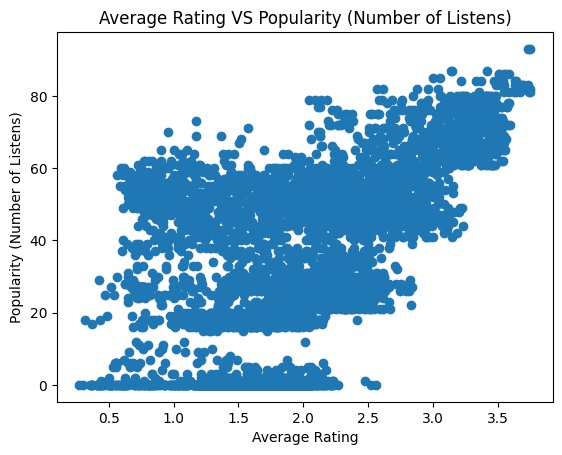

In [ ]:
#plot scatter plot
plt.scatter(songs5k['average_rating'], songs5k['popularity'])
plt.title('Average Rating VS Popularity (Number of Listens)')
plt.xlabel('Average Rating')
plt.ylabel('Popularity (Number of Listens)')

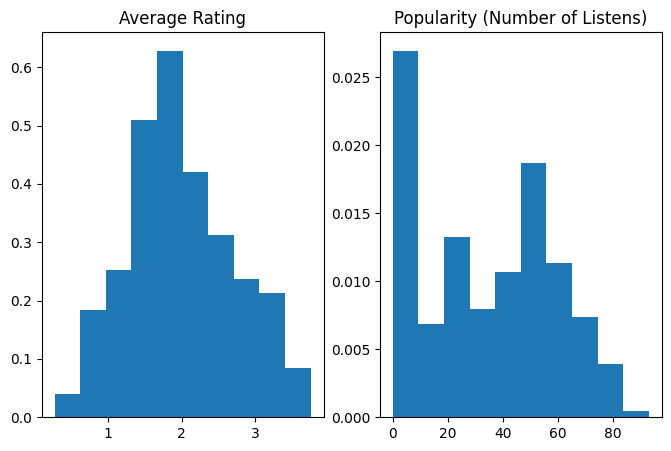

In [ ]:
# Plotting histogram of average ratings
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.hist(songs5k['average_rating'], density=True)
plt.title('Average Rating')

# Plotting histogram of popularity (number of listens)
plt.subplot(1,2,2)
plt.hist(songs5k['popularity'], density=True)
plt.title('Popularity (Number of Listens)')
plt.show()

COD: 0.33141248061733064


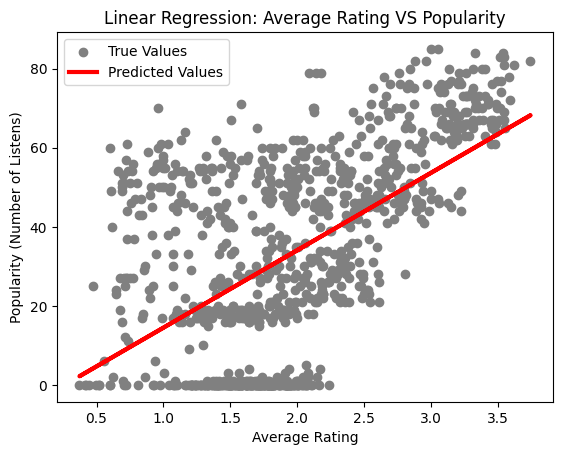

In [ ]:
#simple linear model
x = np.array(songs5k[['average_rating']])
y = np.array(songs5k[['popularity']])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14844467)

reg = LinearRegression().fit(X_train, y_train)
preds = reg.predict(X_test)

COD = r2_score(y_test, preds)
print('COD:', str(COD))

plt.scatter(X_test, y_test, color='grey', label='True Values')
plt.plot(X_test, preds, color='red', linewidth=3, label='Predicted Values')
plt.title('Linear Regression: Average Rating VS Popularity')
plt.xlabel('Average Rating')
plt.ylabel('Popularity (Number of Listens)')
plt.legend()
plt.show()

D^2, percent of deviation explained: 0.24212574803391596


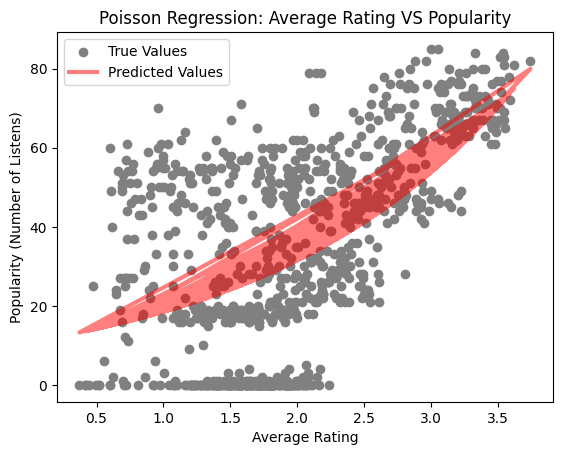

In [ ]:
#poisson regression
x = np.array(songs5k[['average_rating']])
y = np.array(songs5k[['popularity']])

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=14844467)

pr = PoissonRegressor().fit(X_train, y_train)
pr_preds = pr.predict(X_test)

d2 = pr.score(X_test, y_test.ravel())
print('D^2, percent of deviation explained:', str(d2))

plt.scatter(X_test, y_test, color='grey', label='True Values')
plt.plot(X_test, pr_preds, color='red', linewidth=3, label='Predicted Values', alpha=0.5)
plt.title('Poisson Regression: Average Rating VS Popularity')
plt.xlabel('Average Rating')
plt.ylabel('Popularity (Number of Listens)')
plt.legend()
plt.show()

## Which 10 songs are in the “greatest hits” (out of the 5k songs), on the basis of the popularity based model?

In [ ]:
#10 greatest hits according to average rating
greatest_hits = songs5k.sort_values(by='average_rating', ascending=False)
greatest_hits.head(10)

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,average_rating
3877,3877,The Offspring,"Rise And Fall, Rage And Grace","You're Gonna Go Far, Kid",81,177826,True,0.550,0.917,0,...,1,0.0638,0.00428,0.00000,0.197,0.601,126.115,4,alternative,3.750000
3003,3003,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,...,1,0.0336,0.04950,0.01770,0.101,0.398,124.053,4,alternative,3.748950
2260,2260,Red Hot Chili Peppers,By the Way (Deluxe Edition),Can't Stop,82,269000,False,0.618,0.938,9,...,1,0.0456,0.01790,0.00000,0.167,0.875,91.455,4,alt-rock,3.744554
2562,2562,The Offspring,"Rise And Fall, Rage And Grace","You're Gonna Go Far, Kid",81,177826,True,0.550,0.917,0,...,1,0.0638,0.00428,0.00000,0.197,0.601,126.115,4,alt-rock,3.743202
3216,3216,Red Hot Chili Peppers,Californication (Deluxe Edition),Californication,82,329733,False,0.592,0.767,9,...,0,0.0270,0.00210,0.00165,0.127,0.328,96.483,4,alternative,3.741969
2105,2105,Red Hot Chili Peppers,Californication (Deluxe Edition),Californication,82,329733,False,0.592,0.767,9,...,0,0.0270,0.00210,0.00165,0.127,0.328,96.483,4,alt-rock,3.737475
2003,2003,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,...,1,0.0336,0.04950,0.01770,0.101,0.398,124.053,4,alt-rock,3.729651
2011,2011,WALK THE MOON,TALKING IS HARD,Shut Up and Dance,83,199080,False,0.578,0.866,1,...,1,0.0619,0.00701,0.00000,0.257,0.619,128.038,4,alt-rock,3.729124
3464,3464,Red Hot Chili Peppers,By the Way (Deluxe Edition),Can't Stop,82,269000,False,0.618,0.938,9,...,1,0.0456,0.01790,0.00000,0.167,0.875,91.455,4,alternative,3.727829
3253,3253,Gorillaz;Tame Impala;Bootie Brown,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),82,215149,True,0.695,0.923,1,...,0,0.0522,0.04250,0.04690,0.116,0.551,108.014,3,alternative,3.727451


In [ ]:
#handle duplicates
#drop songNumber and average_rating
greatest_hits = greatest_hits.drop_duplicates(subset=['artists', 'album_name', 'track_name'], keep='first')
greatest_hits.head(10)

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,average_rating
3877,3877,The Offspring,"Rise And Fall, Rage And Grace","You're Gonna Go Far, Kid",81,177826,True,0.550,0.917,0,...,1,0.0638,0.004280,0.000000,0.1970,0.601,126.115,4,alternative,3.750000
3003,3003,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,...,1,0.0336,0.049500,0.017700,0.1010,0.398,124.053,4,alternative,3.748950
2260,2260,Red Hot Chili Peppers,By the Way (Deluxe Edition),Can't Stop,82,269000,False,0.618,0.938,9,...,1,0.0456,0.017900,0.000000,0.1670,0.875,91.455,4,alt-rock,3.744554
3216,3216,Red Hot Chili Peppers,Californication (Deluxe Edition),Californication,82,329733,False,0.592,0.767,9,...,0,0.0270,0.002100,0.001650,0.1270,0.328,96.483,4,alternative,3.741969
2011,2011,WALK THE MOON,TALKING IS HARD,Shut Up and Dance,83,199080,False,0.578,0.866,1,...,1,0.0619,0.007010,0.000000,0.2570,0.619,128.038,4,alt-rock,3.729124
3253,3253,Gorillaz;Tame Impala;Bootie Brown,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),82,215149,True,0.695,0.923,1,...,0,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3,alternative,3.727451
3201,3201,Evanescence,Fallen,Bring Me To Life,82,235893,False,0.331,0.943,4,...,0,0.0698,0.007210,0.000002,0.2420,0.296,94.612,4,alternative,3.712598
3007,3007,Linkin Park,Meteora,Numb,83,185586,False,0.496,0.863,9,...,1,0.0381,0.004600,0.000000,0.6390,0.243,110.018,4,alternative,3.685801
2009,2009,Nirvana,Nevermind (Remastered),Smells Like Teen Spirit,83,301920,False,0.502,0.912,1,...,1,0.0564,0.000025,0.000173,0.1060,0.720,116.761,4,alt-rock,3.677518
2770,2770,The Offspring,Americana,The Kids Aren't Alright,81,180160,False,0.523,0.943,1,...,1,0.0337,0.007040,0.000038,0.0579,0.766,99.607,4,alt-rock,3.672234


# Q10

In [ ]:
#copy data
ratings = star_data.copy()
ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
3,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#mean normalize data to account for users who consistently over or under rate songs
ratings_norm = ratings.subtract(ratings.mean(axis=1), axis='rows')
ratings_norm

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.570888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.680585,-1.680585,NaN,NaN,0.319415,NaN,NaN,NaN,-2.680585
3,NaN,0.895636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.231278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,-0.923711,-0.923711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.923711
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,0.254545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.793651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#find how similar users are to each other based on their song ratings
user_similarity = ratings_norm.T.corr()
user_similarity

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.000000,0.170923,0.318970,0.337396,0.277840,0.345420,0.272994,0.475858,0.445813,0.310854,...,0.236431,0.388221,0.425258,0.076518,0.282936,0.317830,0.301495,0.416055,0.295375,0.143780
1,0.170923,1.000000,0.003601,0.336768,-0.002218,0.294242,0.088611,0.175568,0.312060,0.334270,...,0.069651,0.291081,0.265040,0.264926,0.602830,0.346040,0.490896,0.051367,0.342940,0.347294
2,0.318970,0.003601,1.000000,0.467766,0.278230,0.232070,0.306956,0.173488,0.265173,0.304601,...,0.434302,0.109751,0.170637,-0.050246,0.104933,0.359415,0.117770,0.114470,0.162329,0.226345
3,0.337396,0.336768,0.467766,1.000000,0.308181,0.347309,0.299005,0.376177,0.201000,0.080025,...,0.247548,0.360349,0.417724,0.267940,0.340699,0.266531,0.222807,0.201095,0.197797,0.321211
4,0.277840,-0.002218,0.278230,0.308181,1.000000,0.071058,0.332538,0.193243,0.364245,0.097645,...,0.460431,-0.003185,0.407219,0.287381,0.157264,0.387932,0.221187,0.107172,0.138568,0.447740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.317830,0.346040,0.359415,0.266531,0.387932,0.251474,0.486815,0.067784,0.512341,0.461726,...,0.163634,0.192002,0.343759,0.541876,0.331702,1.000000,0.473392,0.312109,0.230174,0.342164
9996,0.301495,0.490896,0.117770,0.222807,0.221187,0.318924,0.280337,0.208161,0.345153,0.416163,...,0.318626,-0.023568,0.270662,0.392597,0.481624,0.473392,1.000000,0.343464,0.467907,0.430451
9997,0.416055,0.051367,0.114470,0.201095,0.107172,-0.029848,0.241169,0.422342,0.467973,0.420471,...,0.198147,0.415389,0.345805,0.427549,0.100673,0.312109,0.343464,1.000000,0.205073,-0.001086
9998,0.295375,0.342940,0.162329,0.197797,0.138568,0.461139,0.094756,-0.068331,0.364778,0.168455,...,0.135385,0.093628,0.429732,0.445617,0.446853,0.230174,0.467907,0.205073,1.000000,0.401149


Text(0.5, 1.0, 'User Similarity/Correlation')

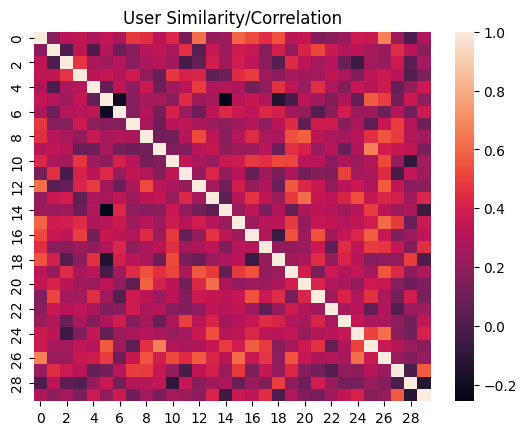

In [ ]:
#heat map sample of user similarity (first 30 users)
sns.heatmap(user_similarity.iloc[0:30,0:30])
plt.title('User Similarity/Correlation')

In [ ]:
#function to generate song rating predictions for unrated songs of a given user
def predicted_song_ratings(picked_userid, user_similarity, ratings_norm, ratings):
    user_sim_df = user_similarity.copy()
    #drop working user (as this would be the most similar user)
    user_sim_df.drop(index=picked_userid, inplace=True)

    #get most similar users (only keep users that have positive similarity score)
    user_sim_thresh = 0
    sim_users = user_sim_df[user_sim_df[picked_userid]>user_sim_thresh][picked_userid].sort_values(ascending=False)
    #sim_users = user_sim_test[picked_userid].sort_values(ascending=False)

    #get songs user has already rated
    picked_userid_listened = ratings_norm[ratings_norm.index == picked_userid].dropna(axis=1, how='all')

    #get songs rated by similar users
    similar_user_songs = ratings_norm[ratings_norm.index.isin(sim_users.index)].dropna(axis=1, how='all')
    #drop songs already rated by user
    similar_user_songs.drop(picked_userid_listened.columns,axis=1, inplace=True, errors='ignore')

    # A dictionary to store item scores
    item_score = {}

    # Loop through items
    for i in similar_user_songs.columns:
        # Get the ratings for movie i
        song_rating = similar_user_songs[i]
        # Create a variable to store the score
        total = 0
        # Create a variable to store the number of scores
        count = 0
        # Loop through similar users
        for u in sim_users.index:
            # If the movie has rating
            if pd.isna(song_rating[u]) == False:
                # Score is the sum of user similarity score multiply by the movie rating
                score = sim_users[u] * song_rating[u]
                # Add the score to the total score for the movie so far
                total += score
                # Add 1 to the count
                count +=1
        # Get the average score for the item
        item_score[i] = total / count

    # Convert dictionary to pandas dataframe
    item_score = pd.DataFrame(item_score.items(), columns=['song', 'song_score'])

    # Sort the movies by score
    ranked_item_score = item_score.sort_values(by='song_score', ascending=False)

    #average rating for user
    avg_rating = ratings[ratings.index == picked_userid].T.mean()[picked_userid]

    #calcuate the predicted rating
    ranked_item_score['predicted_rating'] = ranked_item_score['song_score'] + avg_rating

    return ranked_item_score

In [ ]:
#initialize df that has all true and predicted ratings
full_ratings = ratings.copy()
full_ratings

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
3,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## RUN THIS VERSION FOR ALL 10000 listeners
mixtapes_list = []
for i in tqdm(range(0, 10000)):
    picked_user = i

    ranked_items = predicted_song_ratings(picked_user, user_similarity, ratings_norm, ratings)

    ranked_items = ranked_items.reset_index(drop=True)

    for n in range(len(ranked_items)):
        songid = ranked_items.loc[n, 'song']
        pred_rating = ranked_items.loc[n, 'predicted_rating']

        full_ratings.iloc[songid, picked_user] = pred_rating

    mixtapes_list.append(ranked_items.loc[0:9, 'song'].values)

mixtapes = pd.DataFrame(mixtapes_list)
#mixtapes is a 10x10000 df that lists the top 10 songs recommended to each user
mixtapes = mixtapes.T #transpose to get correct orientation

#save output tables as csv files
mixtapes.to_csv('mixtapes.csv', index=False)
full_ratings.to_csv('full_ratings.csv', index=False)

  0%|          | 0/10000 [00:04<?, ?it/s]


KeyboardInterrupt: ignored

In [ ]:
## RUN THIS VERSION FOR SMALLER SUBSET (first 10 listeners)
mixtapes_list = []
for i in tqdm(range(0, 10)):
    picked_user = i

    ranked_items = predicted_song_ratings(picked_user, user_similarity, ratings_norm, ratings)

    ranked_items = ranked_items.reset_index(drop=True)

    for n in range(len(ranked_items)):
        songid = ranked_items.loc[n, 'song']
        pred_rating = ranked_items.loc[n, 'predicted_rating']

        full_ratings.iloc[songid, picked_user] = pred_rating

    mixtapes_list.append(ranked_items.loc[0:9, 'song'].values)

mixtapes = pd.DataFrame(mixtapes_list)
#mixtapes is a 10x10000 df that lists the top 10 songs recommended to each user
mixtapes = mixtapes.T #transpose to get correct orientation

#save output tables as csv files
mixtapes.to_csv('mixtapes0_9.csv', index=False)
full_ratings.to_csv('full_ratings0_9.csv', index=False)

#save copy in code to run precision/recall tests on
mixtapes0_9 = mixtapes.copy()
full_ratings0_9 = full_ratings.copy()

100%|██████████| 10/10 [37:30<00:00, 225.01s/it]


In [ ]:
mixtapes0_9

,0,1,2,3,4,5,6,7,8,9
0,2105,3464,2011,2562,2562,2105,3201,3877,2011,3003
1,2011,2105,3007,2011,2011,3003,3003,2011,3003,2105
2,2562,2562,3003,3253,3003,2003,2009,3003,3464,3464
3,3216,2011,2003,3464,3877,3253,2011,3201,3201,2260
4,3201,3253,2562,2003,2009,2562,2003,2003,2003,3253
5,3253,2003,2105,3003,3216,3877,3216,2260,2105,3216
6,2260,3216,3877,3216,3054,3007,3253,3253,3216,2562
7,3464,3877,3253,3007,2105,2011,3464,2562,2260,2009
8,3877,3054,3464,2260,3253,2009,3407,3464,3877,3877
9,3007,2260,2009,3201,2003,3464,3877,2009,3407,3201


In [ ]:
full_ratings0_9

,0,1,2,3,4,5,6,7,8,9,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1.994801,2.805392,2.950768,2.482105,3.055246,2.393250,2.948207,2.953877,NaN,2.643445,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.313015,2.185640,2.520258,NaN,2.613590,NaN,2.493163,2.438142,1.542301,2.068371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.625182,2.466860,2.712509,2.156662,2.813286,2.100632,2.700615,2.674655,1.837940,2.317880,...,NaN,2.0,1.0,NaN,NaN,3.0,NaN,NaN,NaN,0.0
3,1.392282,2.269981,2.582038,1.962815,2.670127,1.931920,2.552250,2.505410,1.616546,2.145123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.926086,2.750069,2.918813,2.433990,3.021660,2.356602,2.916715,2.915675,2.158250,2.582698,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#get top 10 greatest hits (from Q9)
greatest_hits10 = greatest_hits.head(10).copy()
greatest_hits10 = greatest_hits10.reset_index(drop=True)
greatest_hits10

,songNumber,artists,album_name,track_name,popularity,duration,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,average_rating
0,3877,The Offspring,"Rise And Fall, Rage And Grace","You're Gonna Go Far, Kid",81,177826,True,0.550,0.917,0,...,1,0.0638,0.004280,0.000000,0.1970,0.601,126.115,4,alternative,3.750000
1,3003,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,...,1,0.0336,0.049500,0.017700,0.1010,0.398,124.053,4,alternative,3.748950
2,2260,Red Hot Chili Peppers,By the Way (Deluxe Edition),Can't Stop,82,269000,False,0.618,0.938,9,...,1,0.0456,0.017900,0.000000,0.1670,0.875,91.455,4,alt-rock,3.744554
3,3216,Red Hot Chili Peppers,Californication (Deluxe Edition),Californication,82,329733,False,0.592,0.767,9,...,0,0.0270,0.002100,0.001650,0.1270,0.328,96.483,4,alternative,3.741969
4,2011,WALK THE MOON,TALKING IS HARD,Shut Up and Dance,83,199080,False,0.578,0.866,1,...,1,0.0619,0.007010,0.000000,0.2570,0.619,128.038,4,alt-rock,3.729124
5,3253,Gorillaz;Tame Impala;Bootie Brown,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),82,215149,True,0.695,0.923,1,...,0,0.0522,0.042500,0.046900,0.1160,0.551,108.014,3,alternative,3.727451
6,3201,Evanescence,Fallen,Bring Me To Life,82,235893,False,0.331,0.943,4,...,0,0.0698,0.007210,0.000002,0.2420,0.296,94.612,4,alternative,3.712598
7,3007,Linkin Park,Meteora,Numb,83,185586,False,0.496,0.863,9,...,1,0.0381,0.004600,0.000000,0.6390,0.243,110.018,4,alternative,3.685801
8,2009,Nirvana,Nevermind (Remastered),Smells Like Teen Spirit,83,301920,False,0.502,0.912,1,...,1,0.0564,0.000025,0.000173,0.1060,0.720,116.761,4,alt-rock,3.677518
9,2770,The Offspring,Americana,The Kids Aren't Alright,81,180160,False,0.523,0.943,1,...,1,0.0337,0.007040,0.000038,0.0579,0.766,99.607,4,alt-rock,3.672234


In [ ]:
#define recall measurement (percentage of top 10 greatest hits that are recommended, regardless of rank order)
def recall(y_true, y_pred):
    y_true = set(y_true)
    y_pred = set(y_pred)

    num_shared = len(y_pred.intersection(y_true))
    num_true = len(y_true)

    output = num_shared/num_true

    return output

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
#precision & recall
#want to know overall how many from most popular are recommended (recall) & also how many are in correct rating spot (precision)

y_true = greatest_hits10['songNumber']

for i in range(0,10):
    y_pred = mixtapes0_9.iloc[:,i]

    recall_val = recall(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='micro')

    print('User:', str(i))
    print('Recall:', str(recall_val))
    print('Precision:', str(precision))
    print()

User: 0
Recall: 0.7
Precision: 0.2

User: 1
Recall: 0.5
Precision: 0.0

User: 2
Recall: 0.6
Precision: 0.0

User: 3
Recall: 0.7
Precision: 0.1

User: 4
Recall: 0.6
Precision: 0.0

User: 5
Recall: 0.6
Precision: 0.2

User: 6
Recall: 0.7
Precision: 0.1

User: 7
Recall: 0.7
Precision: 0.1

User: 8
Recall: 0.6
Precision: 0.1

User: 9
Recall: 0.7
Precision: 0.0



# Extra Credit
Can you predict explicitness from speechiness using logistic regression?

In [ ]:
#inspect data for NaN values
print(data['explicit'].isnull().values.any())
print(data['speechiness'].isnull().values.any())

False
False


No missing data, so no need to handle for NaN values

In [ ]:
#split data
X = np.array(data['speechiness']).reshape(-1,1)
y = data['explicit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=14844467)

In [ ]:
#Logistic Regression
clf = LogisticRegressionCV(random_state=14844467).fit(X_train, y_train) #model
preds = clf.predict(X_test) #predictions

#betas
betas = clf.coef_

#AUC score
y_pred_proba = clf.predict_proba(X_test)[::,1]
auc = sklearn.metrics.roc_auc_score(y_test, y_pred_proba)

print("Betas: ", betas, "\nAUC: ", auc)

Betas:  [[4.2394806]] 
AUC:  0.7731336537286589


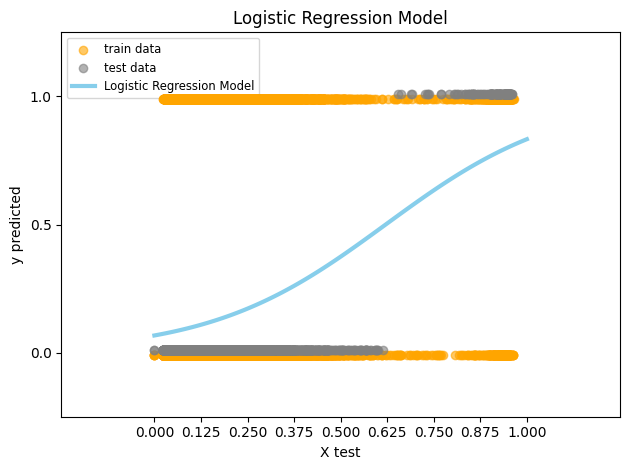

In [ ]:
#test&train data
from scipy.special import expit
plt.clf()
plt.scatter(X_train.ravel(), y_train-0.01, label="train data", color="orange", alpha=0.6, zorder=20)
plt.scatter(X_test, preds.reshape(-1,1)+0.01, label="test data", color="grey", alpha=0.6, zorder=20)
X_test_g = np.linspace(0, 1, 100)

loss = expit(X_test_g * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test_g, loss, label="Logistic Regression Model", color="skyblue", linewidth=3)

plt.ylabel("y predicted")
plt.xlabel("X test")
plt.xticks([0,0.125,0.25,0.375,0.5,0.625,0.75,0.875,1.0])
plt.yticks([0, 0.5, 1])
plt.ylim(-0.25, 1.25)
plt.xlim(-0.25, 1.25)
plt.legend(
    loc="upper left",
    fontsize="small",
)
plt.title('Logistic Regression Model')
plt.tight_layout()
plt.show()

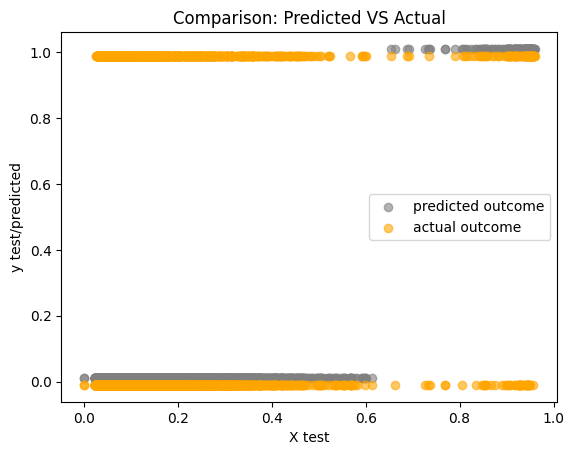

In [ ]:
plt.scatter(X_test, preds.reshape(-1,1)+0.01, label="predicted outcome", color="grey", alpha=0.6, zorder=20)
plt.scatter(X_test, y_test-0.01, label="actual outcome", color="orange", alpha=0.6, zorder=20)
plt.xlabel('X test')
plt.ylabel('y test/predicted')
plt.title('Comparison: Predicted VS Actual')
plt.legend()
plt.show()

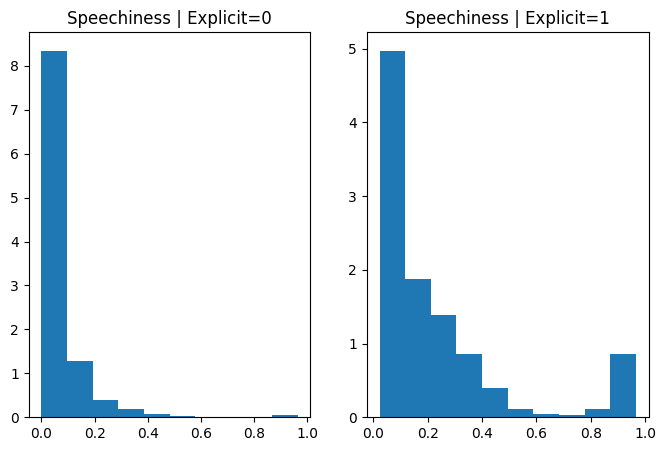

In [ ]:
#histograms of speechiness conditioned on explicity
s_e0 = data.loc[data['explicit']==0, 'speechiness']
s_e1 = data.loc[data['explicit']==1, 'speechiness']

# Plotting histogram of s_e0
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.hist(s_e0, density=True)
plt.title('Speechiness | Explicit=0')

# Plotting histogram of s_e1
plt.subplot(1,2,2)
plt.hist(s_e1, density=True)
plt.title('Speechiness | Explicit=1')
plt.show()